In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
customers=pd.read_csv('Ecommerce Customers')

In [10]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [12]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


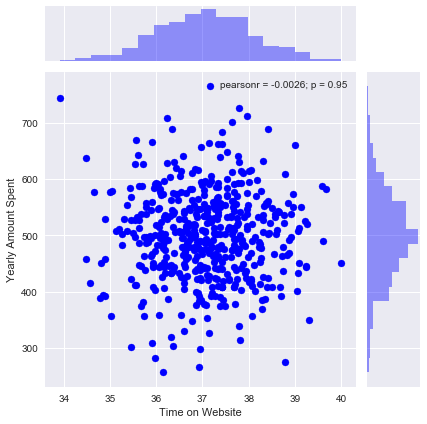

In [13]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,color='Blue')

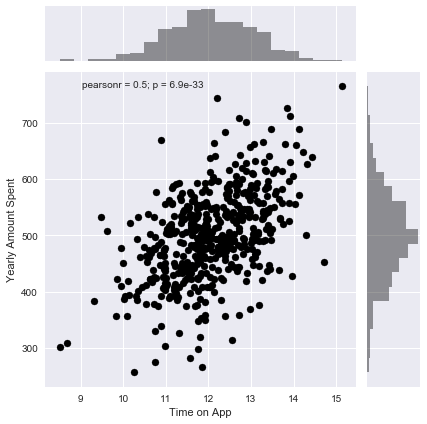

In [14]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,color='Black')

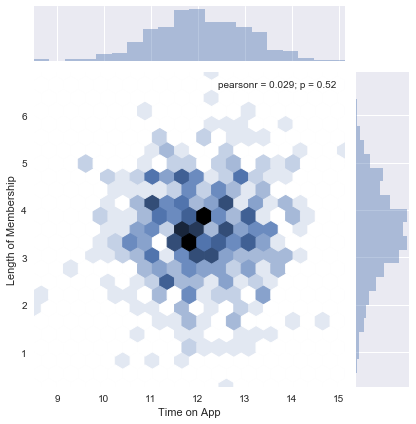

In [15]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

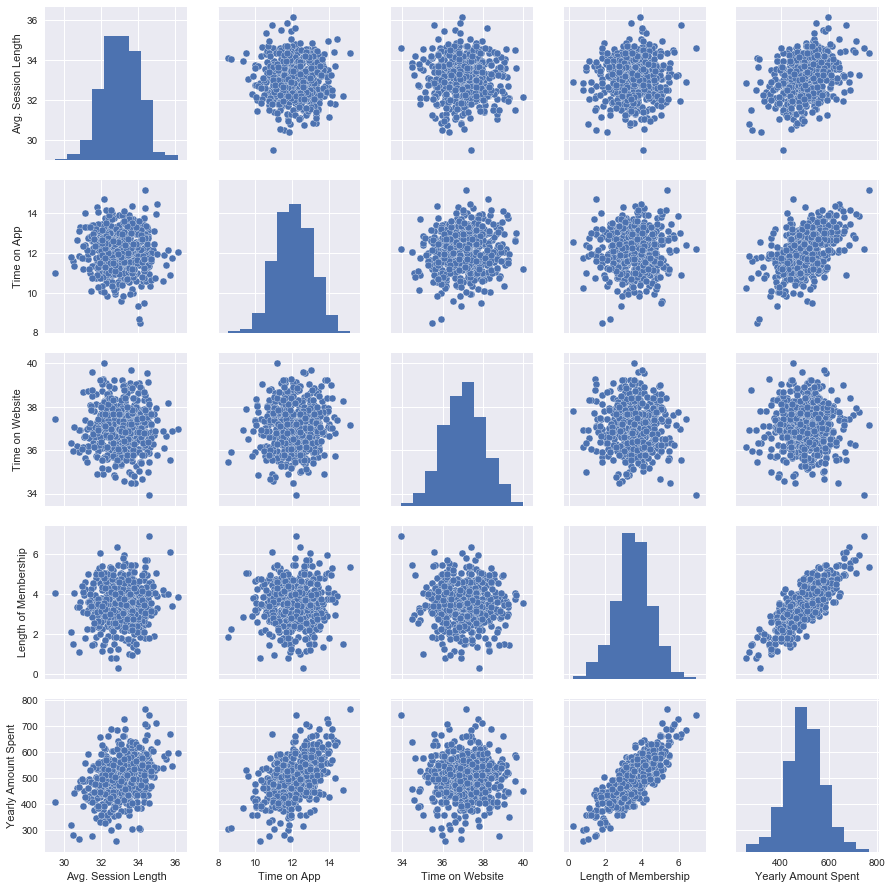

In [16]:
sns.pairplot(customers)

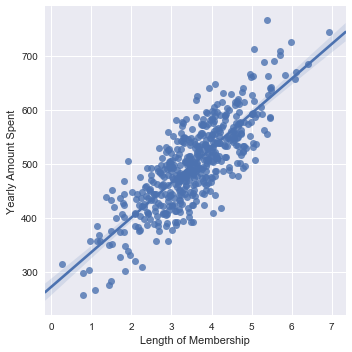

In [17]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [18]:
X=customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
Y=customers['Yearly Amount Spent']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm=LinearRegression()

In [23]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
lm.coef_

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

In [30]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [25]:
predictions=lm.predict(X_test)

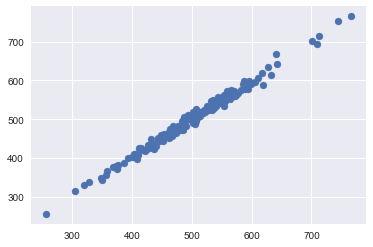

In [26]:
plt.scatter(Y_test,predictions)

In [27]:
from sklearn import metrics

In [28]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


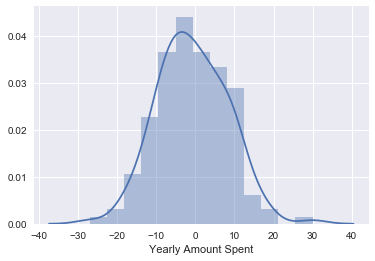

In [29]:
sns.distplot(Y_test-predictions)